# Содержание

1. [Задача](#задача)
2. [Ход работы](#ход-работы)
    1. [Нахождение отношения последующих членов ряда](#нахождение-отношения-последующих-членов-ряда)
    2. [Табулирование функции на $[a, b]$ с шагом $h$](#табулирование-функции-на-a-b-с-шагом-h)
    3. [Построение интерполяционного полинома Лагранжа](#построение-интерполяционного-полинома-лагранжа)
        1. [График функции erf(x) и интерполяционного полинома Лагранжа](#график-функции-erfx-и-интерполяционного-полинома-лагранжа)
        2. [График погрешности интерполяции на отрезке](#график-погрешности-интерполяции-на-отрезке)
    4. [Построение графика изменения погрешности](#построение-графика-изменения-погрешности)
    5. [Табулирование функции на $[a, b]$ в узлах Чебышева](#табулирование-функции-на-a-b-в-узлах-чебышева)
        1. [График функции erf(x) и интерполяционного полинома Лагранжа (узлы Чебышева)](#график-функции-erfx-и-интерполяционного-полинома-лагранжа-узлы-чебышева)
        2. [График погрешности интерполяции на отрезке (узлы Чебышева)](#график-погрешности-интерполяции-на-отрезке-узлы-чебышева)
    6. [Анализ погрешности для узлов Чебышева](#анализ-погрешности-для-узлов-чебышева)
3. [Вывод](#вывод)
4. [Используемая литература](#используемая-литература)

# Задача
Одна из специальных функций математической физики — функция ошибок, определяется следующим образом:
$$
\text{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} \, dt.
$$
Целью данной работы является изучение и сравнение различных способов приближенного вычисления этой функции.

Для достижения поставленной цели необходимо:
1. Найти отношение последующих членов ряда Тейлора для заданной функции ошибок:
$$
\text{erf}(x) = \frac{2}{\sqrt{\pi}} \sum_{n=0}^{\infty} \frac{(-1)^n x^{2n+1}}{n!(2n+1)}.
$$
2. Протабулировать $\text{erf}(x)$ на отрезке $[a, b]$ с шагом $h$ и точностью $\epsilon$ ($a = 0$, $b = 2$, $h = 6$, $\epsilon = 10^{-6}$), основываясь на ряде Тейлора.
3. По полученной таблице значений построить интерполяционный полином Лагранжа, приближающий $\text{erf}(x)$.
4. Построить график зависимости погрешности от числа узлов интерполяции.
5. Протабулировать отрезок $[a, b]$, используя узлы Чебышева:
$$
x_i = \frac{a + b}{2} + \frac{b - a}{2} \cos\left(\frac{\pi(2i + 1)}{2n + 2}\right), \quad i = 0, \ldots, n.
$$

# Ход работы

## Нахождение отношения последующих членов ряда

Для оптимизации алгоритма вычисления заданного ряда необходимо вычислить отношение последующего члена ряда к предыдущему. Это позволит вычислять следующий член через предыдущий без повторного вычисления факториалов.

Общий член ряда для $\text{erf}(x)$ имеет вид:

$$
a_n = \frac{2}{\sqrt{\pi}} \cdot \frac{(-1)^n x^{2n+1}}{n!(2n+1)}.
$$

Следующий член:

$$
a_{n+1} = \frac{2}{\sqrt{\pi}} \cdot \frac{(-1)^{n+1} x^{2n+3}}{(n+1)!(2n+3)}.
$$

Вычислим отношение $q_n(x) = \frac{a_{n+1}}{a_n}$:

$$
q_n(x) = \frac{a_{n+1}}{a_n} = 
$$
$$
= \frac{(-1)^{n+1} x^{2n+3}}{(n+1)!(2n+3)} \cdot \frac{n!(2n+1)}{(-1)^n x^{2n+1}} =
$$
$$
= -x^2 \cdot \frac{n!(2n+1)}{(n+1)!(2n+3)}.
$$

Учитывая, что $(n+1)! = (n+1) \cdot n!$, получаем:

$$
q_n(x) = -x^2 \cdot \frac{2n+1}{(n+1)(2n+3)}.
$$

Таким образом, последующий член $a_{n+1}$ вычисляется как $a_{n+1} = q_n(x)a_n$, что позволяет избежать повторного вычисления факториалов.

Полученное отношение описывается следующей функцией:

In [1]:
def ratio_series(x: float, n: int) -> float:
    """
    q_n(x) - отношения последующего члена к предыдущему
    :param x: аргумент
    :param n: индекс члена ряда
    """
    return -(
            x**2 * (2*n + 1)
    ) / (
            (n + 1) * (2*n + 3)
    )

Вычисление суммы ряда реализуется следующей функцией с использованием функции отношения `ratio_series`:

In [2]:
import math

def series(x: float, eps: float = 10 ** -6) -> float:
    """
    S_n(x) - реализация с использованием заранее вычисленного отношения последующего члена
    :param x: аргумент
    :param eps: точность
    """
    n = 0
    # Для erf(x) первый член (n=0): 2/sqrt(pi) * x
    series_member_old = 2 / math.sqrt(math.pi) * x
    sum_series = series_member_old
    while True:
        n += 1
        series_member_new = series_member_old * ratio_series(x, n - 1)
        sum_series += series_member_new
        if abs(series_member_new - series_member_old) < eps: break
        series_member_old = series_member_new
    return sum_series

## Табулирование функции на $[a, b]$ с шагом $h$
Функция табулирования значений на заданном отрезке $[a, b]$ с шагом $h$ реализуется следующим образом:

In [3]:
def get_tab_x(a: float = 0, b: float = 2, n: int = 5)-> list[float]:
    """
    :param a: начальная точка отрезка a < b
    :param b: конечная точка отрезка b > a
    :param n: количество интервалов 
    :return: список точек
    """
    h = (b - a) / n
    tab_x = [a]
    while len(tab_x) < n: tab_x.append(tab_x[-1] + h)
    tab_x.append(b)
    return tab_x

Построена таблица значений функции в табулируемых точках:

In [4]:
import pandas
from dataclasses import dataclass

@dataclass(frozen=True)
class Point:
    x: float
    y: float

tabulate_series = [Point(x, series(x)) for x in get_tab_x()]
x_values = [point.x for point in tabulate_series]
y_values = [point.y for point in tabulate_series]

pandas.DataFrame([x_values, y_values], index=['x', 'f(x)'])

,0,1,2,3,4,5
x,0.0,0.400000,0.800000,1.200000,1.600000,2.000000
f(x),0.0,0.428392,0.742101,0.910314,0.976348,0.995322


## Построение интерполяционного полинома Лагранжа

Интерполяционный полином Лагранжа реализуется функцией, аргументами которой являются значение $x$ и узлы интерполяции:

In [5]:
def lagrange_polynomial(x: float, points: list[Point]) -> float:
    n = len(points)
    result_sum = 0
    for i in range(n):
        result_mult = 1
        for j in range(n):
            if j == i: continue
            result_mult *= (x - points[j].x) / (points[i].x - points[j].x)
        result_sum += points[i].y * result_mult
    return result_sum


Проведено сравнение значений суммы ряда и интерполяционного полинома в узлах интерполяции:

In [6]:
x_array = get_tab_x(n=5)

result_table = {
    'x_i': x_array,
    'S(x_i)': [series(x) for x in x_array],
    'L(x_i)': [lagrange_polynomial(x, tabulate_series) for x in x_array],
}

pandas.DataFrame(result_table)

,x_i,S(x_i),L(x_i)
0,0.0,0.000000,0.000000
1,0.4,0.428392,0.428392
2,0.8,0.742101,0.742101
3,1.2,0.910314,0.910314
4,1.6,0.976348,0.976348
5,2.0,0.995322,0.995322


In [7]:
x_array = get_tab_x(n=10)
series_array = [series(x) for x in x_array]
interpolate_points = [Point(x, s) for x, s in zip(x_array, series_array)]
lp_array = [lagrange_polynomial(x, tabulate_series) for x in x_array]

result_table = {
    'x_i': x_array,
    'S(x_i)': series_array,
    'L(x_i)': lp_array,
    'Погрешность': [abs(s - l) for s, l in zip(series_array, lp_array)]
}

pandas.DataFrame(result_table)

,x_i,S(x_i),L(x_i),Погрешность
0,0.0,0.000000,0.000000,0.000000e+00
1,0.2,0.222703,0.222006,6.966212e-04
2,0.4,0.428392,0.428392,0.000000e+00
3,0.6,0.603856,0.603976,1.195797e-04
4,0.8,0.742101,0.742101,0.000000e+00
5,1.0,0.842701,0.842694,6.696360e-06
6,1.2,0.910314,0.910314,0.000000e+00
7,1.4,0.952285,0.952205,8.031128e-05
8,1.6,0.976348,0.976348,2.220446e-16
9,1.8,0.989090,0.989516,4.258059e-04


### График функции erf(x) и интерполяционного полинома Лагранжа

Построим график функции erf(x), вычисленной через ряд Тейлора, и интерполяционного полинома Лагранжа на основе 6 узлов интерполяции.

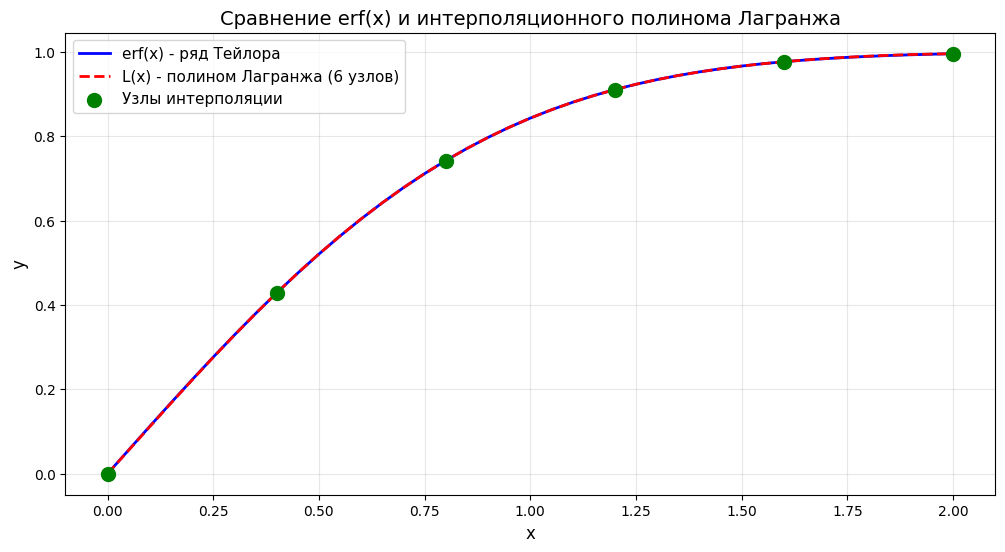

In [8]:
import matplotlib.pyplot as plt

# Построение графика функции erf(x) и интерполяционного полинома
x_plot = [i * 0.05 for i in range(0, 41)]  # Точки для построения графика от 0 до 2 с шагом 0.05
y_series = [series(x) for x in x_plot]
y_lagrange = [lagrange_polynomial(x, tabulate_series) for x in x_plot]

plt.figure(figsize=(12, 6))
plt.plot(x_plot, y_series, label='erf(x) - ряд Тейлора', linewidth=2, color='blue')
plt.plot(x_plot, y_lagrange, label='L(x) - полином Лагранжа (6 узлов)', linewidth=2, linestyle='--', color='red')
plt.scatter(x_values, y_values, color='green', s=100, zorder=5, label='Узлы интерполяции')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Сравнение erf(x) и интерполяционного полинома Лагранжа', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

### График погрешности интерполяции на отрезке

Построим график погрешности интерполяции в зависимости от точки на отрезке [0, 2]. Это позволит увидеть, как погрешность распределена по интервалу при использовании равномерной сетки узлов.

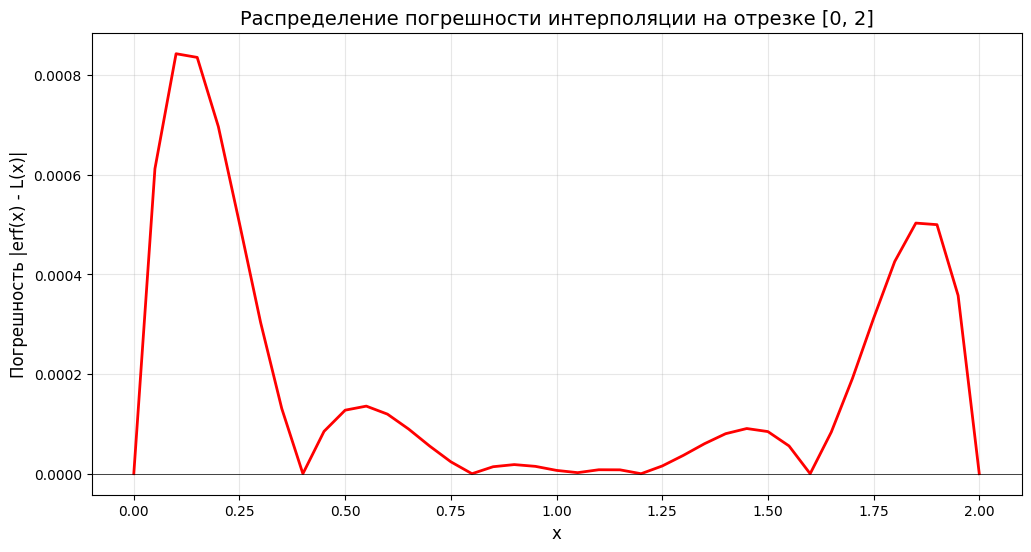

In [9]:
import matplotlib.pyplot as plt
# Построение графика погрешности на отрезке
error_plot = [abs(series(x) - lagrange_polynomial(x, tabulate_series)) for x in x_plot]

plt.figure(figsize=(12, 6))
plt.plot(x_plot, error_plot, linewidth=2, color='red')
plt.xlabel('x', fontsize=12)
plt.ylabel('Погрешность |erf(x) - L(x)|', fontsize=12)
plt.title('Распределение погрешности интерполяции на отрезке [0, 2]', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.show()

## Построение графика изменения погрешности

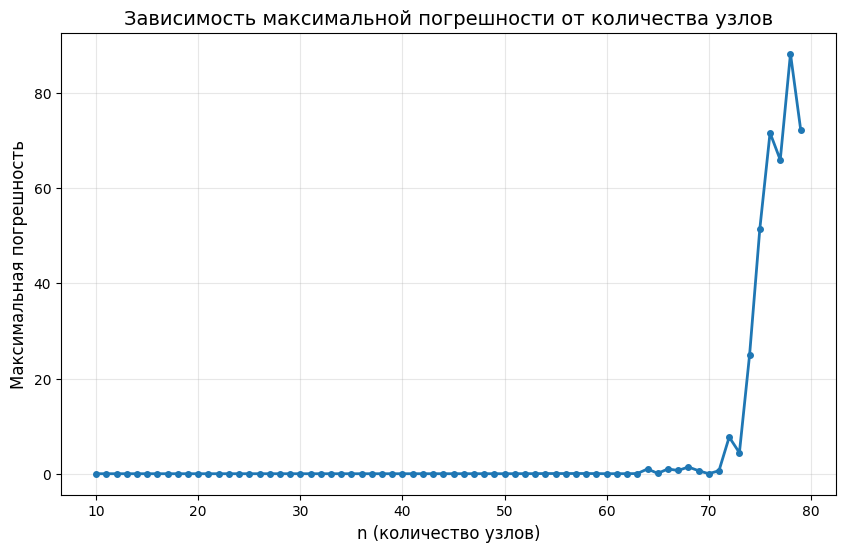

In [10]:
import matplotlib.pyplot as plt

n_array = [i for i in range(10, 80)]
max_error_rate = []

for n in n_array:
    error_rate = []
    for x in get_tab_x(n=10):
        interpolate_points = [Point(x, series(x)) for x in get_tab_x(n=n)]
        f_s = series(x)
        f_lp = lagrange_polynomial(x, interpolate_points)
        error_rate.append(abs(f_s - f_lp))
    max_error_rate.append(max(error_rate))

plt.figure(figsize=(10, 6))
plt.plot(n_array, max_error_rate, marker='o', linestyle='-', linewidth=2, markersize=4)
plt.xlabel('n (количество узлов)', fontsize=12)
plt.ylabel('Максимальная погрешность', fontsize=12)
plt.title('Зависимость максимальной погрешности от количества узлов', fontsize=14)
plt.grid(True, alpha=0.3)

plt.show()

## Табулирование функции на $[a, b]$ в узлах Чебышева

In [11]:
import math
def get_tab_x_cheb(a: int = 0, b: int = 2, n: int = 5) -> list[float]:
    tab_x = []
    for i in range(n + 1):
        x_i = (a + b) / 2 + (b - a) / 2 * math.cos(math.pi * (2*i + 1) / (2*n + 2))
        tab_x.append(x_i)
    return tab_x

Построена таблица значений функции erf(x) и интерполяционного полинома Лагранжа в узлах Чебышева:

In [12]:
# Создаем узлы Чебышева для интерполяции (6 узлов как в первой части)
tabulate_series_cheb = [Point(x, series(x)) for x in get_tab_x_cheb(n=5)]
x_values_cheb = [point.x for point in tabulate_series_cheb]
y_values_cheb = [point.y for point in tabulate_series_cheb]

# Проверяем интерполяцию на 11 точках (равномерных для сравнения)
x_array_test = get_tab_x(n=10)
series_array_cheb = [series(x) for x in x_array_test]
lp_array_cheb = [lagrange_polynomial(x, tabulate_series_cheb) for x in x_array_test]

result_table_cheb = {
    'x_i': x_array_test,
    'S(x_i)': series_array_cheb,
    'L(x_i)': lp_array_cheb,
    'Погрешность': [abs(s - l) for s, l in zip(series_array_cheb, lp_array_cheb)]
}

pandas.DataFrame(result_table_cheb)

,x_i,S(x_i),L(x_i),Погрешность
0,0.0,0.000000,0.000440,0.000440
1,0.2,0.222703,0.222429,0.000274
2,0.4,0.428392,0.428603,0.000211
3,0.6,0.603856,0.604007,0.000151
4,0.8,0.742101,0.742063,0.000038
5,1.0,0.842701,0.842676,0.000025
6,1.2,0.910314,0.910331,0.000017
7,1.4,0.952285,0.952197,0.000088
8,1.6,0.976348,0.976224,0.000124
9,1.8,0.989090,0.989246,0.000156


### График функции erf(x) и интерполяционного полинома Лагранжа (узлы Чебышева)

Построим график функции erf(x) и интерполяционного полинома Лагранжа, используя узлы Чебышева для интерполяции.

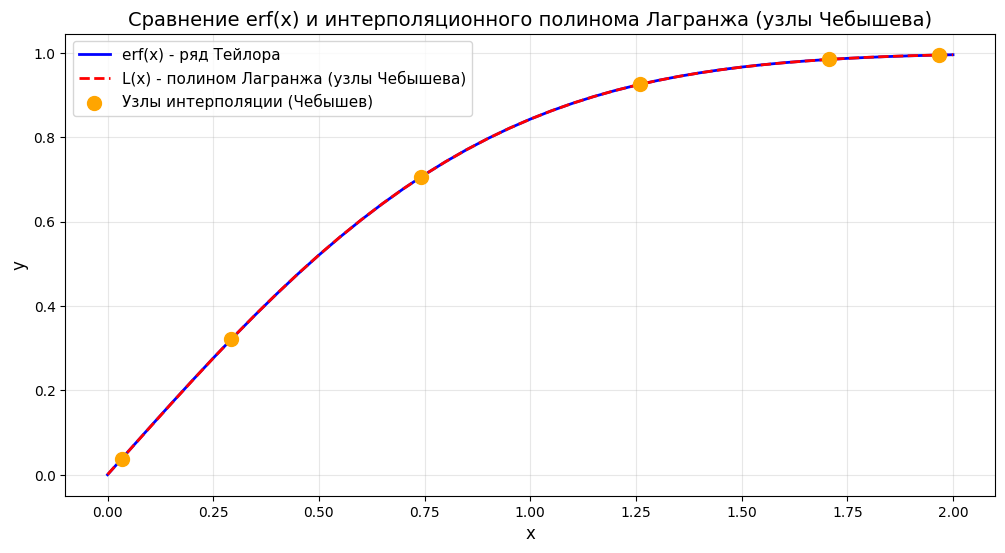

In [13]:
# Построение графика функции erf(x) и интерполяционного полинома с узлами Чебышева
x_plot_cheb = [i * 0.05 for i in range(0, 41)]  # Точки для построения графика от 0 до 2 с шагом 0.05
y_series_cheb = [series(x) for x in x_plot_cheb]
y_lagrange_cheb = [lagrange_polynomial(x, tabulate_series_cheb) for x in x_plot_cheb]

plt.figure(figsize=(12, 6))
plt.plot(x_plot_cheb, y_series_cheb, label='erf(x) - ряд Тейлора', linewidth=2, color='blue')
plt.plot(x_plot_cheb, y_lagrange_cheb, label='L(x) - полином Лагранжа (узлы Чебышева)', linewidth=2, linestyle='--', color='red')
plt.scatter(x_values_cheb, y_values_cheb, color='orange', s=100, zorder=5, label='Узлы интерполяции (Чебышев)')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Сравнение erf(x) и интерполяционного полинома Лагранжа (узлы Чебышева)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

### График погрешности интерполяции на отрезке (узлы Чебышева)

Построим график погрешности интерполяции в зависимости от точки на отрезке [0, 2] при использовании узлов Чебышева. Это позволит сравнить распределение погрешности с случаем равномерной сетки узлов.

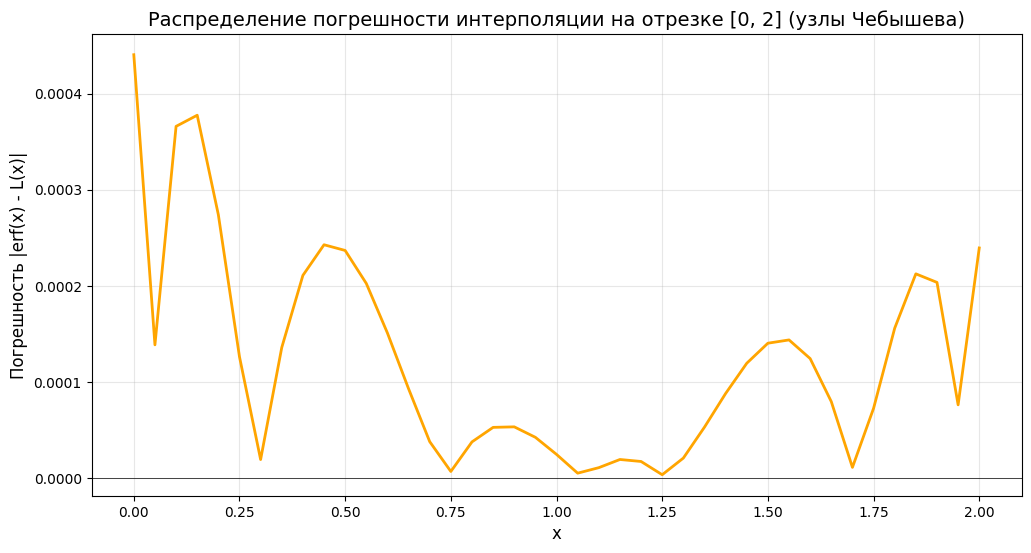

In [14]:
# Построение графика погрешности на отрезке с узлами Чебышева
error_plot_cheb = [abs(series(x) - lagrange_polynomial(x, tabulate_series_cheb)) for x in x_plot_cheb]

plt.figure(figsize=(12, 6))
plt.plot(x_plot_cheb, error_plot_cheb, linewidth=2, color='orange')
plt.xlabel('x', fontsize=12)
plt.ylabel('Погрешность |erf(x) - L(x)|', fontsize=12)
plt.title('Распределение погрешности интерполяции на отрезке [0, 2] (узлы Чебышева)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.show()

## Анализ погрешности для узлов Чебышева

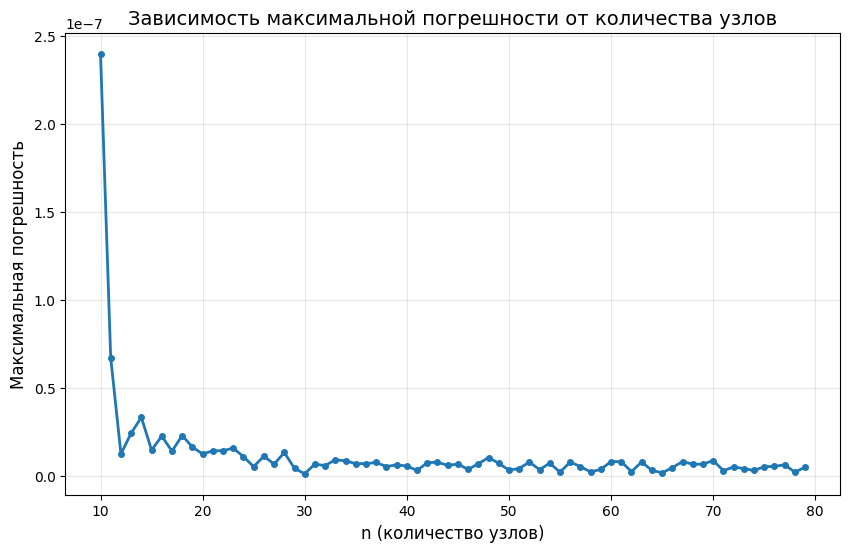

In [15]:
n_array = [i for i in range(10, 80)]
max_error_rate = []

for n in n_array:
    error_rate = []
    for x in get_tab_x(n=10):
        interpolate_points = [Point(x, series(x)) for x in get_tab_x_cheb(n=n)]
        f_s = series(x)
        f_lp = lagrange_polynomial(x, interpolate_points)
        error_rate.append(abs(f_s - f_lp))
    max_error_rate.append(max(error_rate))

plt.figure(figsize=(10, 6))
plt.plot(n_array, max_error_rate, marker='o', linestyle='-', linewidth=2, markersize=4)
plt.xlabel('n (количество узлов)', fontsize=12)
plt.ylabel('Максимальная погрешность', fontsize=12)
plt.title('Зависимость максимальной погрешности от количества узлов', fontsize=14)
plt.grid(True, alpha=0.3)

plt.show()

# Вывод

В ходе выполнения работы были изучены и сравнены различные методы приближенного вычисления функции ошибок $\text{erf}(x)$.
Для эффективного вычисления функции был получен ряд Тейлора и найдено отношение последующих членов ряда к предыдущим, что позволило оптимизировать алгоритм вычислений без повторного расчета факториалов. Функция была протабулирована на отрезке $[0, 2]$ с заданной точностью $\epsilon = 10^{-6}$.

На основе полученной таблицы значений был построен интерполяционный полином Лагранжа. Анализ погрешности показал, что при использовании равномерной сетки узлов интерполяции максимальная погрешность имеет тенденцию к возрастанию с увеличением количества узлов, что связано с явлением Рунге — характерным поведением полиномов высоких степеней на границах интервала.

Для улучшения качества интерполяции была применена сетка узлов Чебышева. График зависимости погрешности от количества узлов показал существенное улучшение результатов: погрешность монотонно убывает с ростом числа узлов интерполяции. Это подтверждает теоретическое преимущество использования чебышевских узлов для интерполяции функций — они минимизируют максимальную погрешность интерполяции и устраняют эффект Рунге.

Таким образом, выбор узлов интерполяции критически важен для точности приближения функций полиномами Лагранжа, и узлы Чебышева являются оптимальным выбором для равномерной минимизации погрешности на всем интервале.

# Используемая литература

1. Бахвалов, Н.С. Численные методы / Н.С. Бахвалов, Н.П. Жидков, Г.М. Кобельков. — М.: Лаборатория Базовых Знаний, 2000. — 630 с.
2. Калиткин, Н.Н. Численные методы / Н.Н. Калиткин. — М.: Наука, 1978. — 512 с.